In [15]:
import string
from collections import Counter

import matplotlib.pyplot as plt

In [16]:

def get_tweets():
    import GetOldTweets3 as got   
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#COVID-19') \
        .setSince("2020-02-20") \
        .setUntil("2020-03-20") \
        .setMaxTweets(100)
   
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [17]:

# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

#lowercase
lower_case = text.lower()

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

tokenized_words = cleaned_text.split()

In [5]:
text_tweets

[["Me wondering why it's taken @765nic this long to create a meme about me and COVID-19... "],
 ['Hace unas semanas andaba llamando a marchar cuando ya habian confirmados con COVID-19 en Chile ... completamente descriteriada! '],
 ['COVID-19: Keeping safe and The Icehouse Community https://hubs.ly/H0nJ-TJ0 Now is the perfect time to update our network and friends on how we at The Icehouse are responding to the Coronavirus (COVID-19) situation. #covid-19 #theicehouse #strongertogether'],
 ['Disaster scenarios out of #Iran re #coronavirus. 18k "official" cases, likely double or triple that. Experts estimate best case scenario 120k infected w/ 12k deaths. Worst case is 4 million cases w/ 3.5 million deaths - staggering 87% fatality. #Covid_19 '],
 [" c'est une blague??? La France touche le fond!!! @afpfr @EmmanuelMacron @gerardcollomb @villedelyon @BFMLyon #lyon #France #COVID19 #RESTEZCHEZVOUS #SDF @Actions_SDF #JeResteChezMoi #ConfinementJour3 #coronavirus #Covid_19 #TPMP #FightCOVID19 

In [6]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

final_words = [word for word in tokenized_words if word not in stop_words]

In [7]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' sad': 21, ' fearful': 20, ' happy': 16, ' attracted': 11, ' angry': 10, ' powerless': 10, ' attached': 8, ' adequate': 7, ' fearless': 6, ' anxious': 6, ' entitled': 6, ' loved': 5, ' esteemed': 5, ' hated': 5, ' alone': 4, ' singled out': 4, ' cheated': 3, ' average': 3, ' surprise': 3, ' focused': 3, ' free': 3, ' apathetic': 3, ' bored': 2, ' safe': 2, ' ecstatic': 2, ' independent': 2, ' demoralized': 1, ' lustful': 1, ' belittled': 1, ' lost': 1, ' derailed': 1, ' embarrassed': 1, ' obsessed': 1})


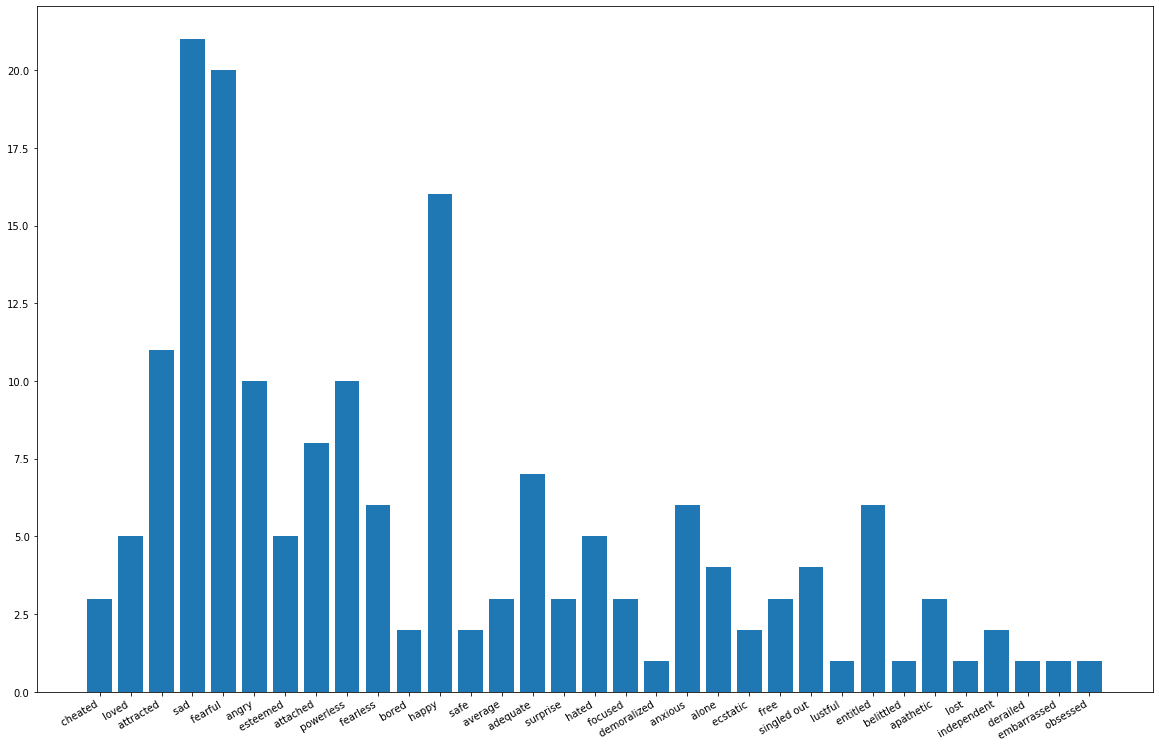

In [19]:
plt.rcParams['figure.figsize'] = (20,14)
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [18]:
import nltk
#nltk.download('punkt')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
#nltk.download('stopwords')

tweets_words = cleaned_text

stop_words = set(stopwords.words('english'))

word_tokens = nltk.word_tokenize(tweets_words)

filtered_words = [w for w in word_tokens if not w in stop_words]

filtered_words = []

for w in word_tokens:
    if w not in stop_words:
        filtered_words.append(w)

print(word_tokens)


['if', 'every', 'nba', 'player', 'has', 'covid19', 'can', 'we', 'just', 'let', 'them', 'all', 'play', 'again', 'hati2', 'people', 'virus', 'corona', 'ini', 'sadiss', 'indonesia', 'covid19', 'wuhan', 'banten', 'surabaya', 'dkijakarta', 'britpop', 'music', 'lockdown', 'krismon', 'workout', 'work', 'industrial', 'karaoke', 'virus', 'jawa', 'kalimantan', 'sumatera…', 'httpswwwinstagramcompb97z3kal8s7igshid5ratuijcksg8', 'absolutely', 'stupid', 'probably', 'negatively', 'correlated', 'with', 'covid19', 'damage', 'only', 'one', 'way', 'to', 'fight', 'through', 'this', 'pandemic', 'lads', 'the', 'return', 'of', 'bike', 'mania', 'coronavirus', 'covid19', 'help', 'prevent', 'covid', '19', 'the', 'shocking', 'centre', 'of', 'the', 'covid19', 'crisis', 'total', 'cost', 'of', 'her', 'covid19', 'treatment', '3492743', 'by', 'winning', 'do', 'you', 'mean', 'no', 'one', 'dies', 'from', 'covid19', 'there', 'are', 'plenty', 'of', 'ppe', '’', 's', 'and', 'defibrillators', 'for', 'our', 'hard', 'working'

In [19]:
print(filtered_words)

['every', 'nba', 'player', 'covid19', 'let', 'play', 'hati2', 'people', 'virus', 'corona', 'ini', 'sadiss', 'indonesia', 'covid19', 'wuhan', 'banten', 'surabaya', 'dkijakarta', 'britpop', 'music', 'lockdown', 'krismon', 'workout', 'work', 'industrial', 'karaoke', 'virus', 'jawa', 'kalimantan', 'sumatera…', 'httpswwwinstagramcompb97z3kal8s7igshid5ratuijcksg8', 'absolutely', 'stupid', 'probably', 'negatively', 'correlated', 'covid19', 'damage', 'one', 'way', 'fight', 'pandemic', 'lads', 'return', 'bike', 'mania', 'coronavirus', 'covid19', 'help', 'prevent', 'covid', '19', 'shocking', 'centre', 'covid19', 'crisis', 'total', 'cost', 'covid19', 'treatment', '3492743', 'winning', 'mean', 'one', 'dies', 'covid19', 'plenty', 'ppe', '’', 'defibrillators', 'hard', 'working', 'physicians', 'nurses', 'test', 'kits', 'everyone', 'pay', 'bills', 'plenty', 'food', 'water', '’', 'found', 'cure', '’', 'gon', 'na', 'show', 'kids', 'iamlegend', 'tell', '’', 'documentary', 'covid19', 'ima', 'look', 'eyes'

In [20]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

#final_words = [word for word in tokenized_words if word not in stop_words]

In [21]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in word_tokens:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)


Counter({' safe': 1, ' fearless': 1, ' average': 1, ' adequate': 1, ' sad': 1, ' happy': 1, ' lost': 1, ' attracted': 1, ' free': 1, ' independent': 1, ' surprise': 1, ' fearful': 1})


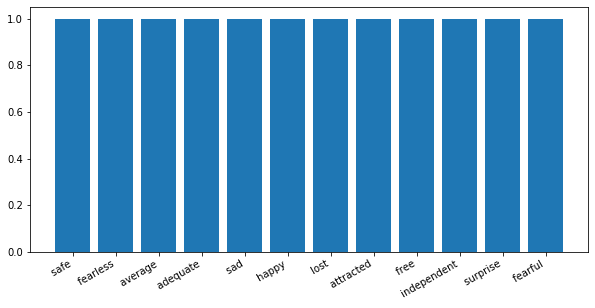

In [22]:
plt.rcParams['figure.figsize'] = (10,5)
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()